In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Annual/ALL_BETA_M_5Y.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,20180930,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015,Unnamed: 5016,Unnamed: 5017,Unnamed: 5018,Unnamed: 5019
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,...,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA
3,Item,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,...,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005,S41B0M5005
4,Item Name,"베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)",...,"베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)","베타 (M,5Yr)"
5,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
6,1990-12-31,1.191400,NaN,NaN,0.669370,NaN,NaN,NaN,1.134460,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [5]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=2)

# 수익률 DF 전처리

In [7]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=2).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [8]:
rt_df.head()

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,0.8188,0.8689,0.9717,1.0400,1.2105,0.7921,0.7560,0.5406,0.3468,0.6840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,0.8185,0.8322,1.4148,1.2452,2.2504,0.5620,0.9526,0.2715,2.5781,1.0949,...,0.5765,1.2265,0.6979,0.7713,1.4804,0.7268,1.2688,1.4614,0.9975,1.2007
A000030,0.8000,0.8833,0.9528,0.8731,0.9847,0.9810,0.7216,0.5345,0.2705,0.5818,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6494,0.8820,1.4456,1.2353
A000040,0.7571,0.5425,1.7913,1.1683,0.9068,0.7944,1.4471,0.0967,0.6666,0.6218,...,0.3075,1.8986,1.2052,0.9852,0.7423,0.8869,2.3627,1.2274,0.6792,0.3767
A000050,1.0082,1.0183,1.0489,1.1787,1.2502,0.7268,1.1234,0.3794,1.0925,1.3153,...,0.3128,2.1068,0.9378,0.7784,1.1437,1.3364,1.6697,1.0577,0.7948,0.9085


# 포트폴리오 구성 수행

In [9]:
data = Ko.portfolio_selection(per_df)

In [10]:
data.head(5)

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,x,8,8,8,7,7,6,5,1,3,...,7,6,6,7,6,6,6,7,7,7
A000020,x,2,5,4,3,5,7,6,6,9,...,4,6,3,3,4,2,1,4,4,1
A000030,x,7,7,8,7,7,5,4,1,2,...,2,1,1,1,1,2,2,2,2,7
A000040,x,9,9,8,9,9,8,6,8,6,...,8,8,7,7,6,5,4,4,2,0
A000050,x,0,0,0,0,0,0,2,5,2,...,1,5,6,8,7,8,6,2,3,5


In [11]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [12]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [13]:
result.min()

GROUP_0    0.489743
GROUP_1    0.475021
GROUP_2    0.475799
GROUP_3    0.404034
GROUP_4    0.391434
GROUP_5    0.403642
GROUP_6    0.387874
GROUP_7    0.415760
GROUP_8    0.397244
GROUP_9    0.368743
dtype: float64

In [14]:
result.max()

GROUP_0    3.188607
GROUP_1    2.096841
GROUP_2    2.660473
GROUP_3    2.606311
GROUP_4    2.258621
GROUP_5    2.380820
GROUP_6    2.015020
GROUP_7    2.529838
GROUP_8    2.377498
GROUP_9    3.403609
dtype: float64

# 1990년대

In [15]:
result.head(10)

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
1990-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1991-12-31,0.934237,0.898718,0.823113,0.855078,0.759141,0.733131,0.721917,0.763209,0.799952,0.789082
1992-12-31,1.258543,1.373088,1.298588,1.359720,1.279155,1.272583,1.516061,1.230456,1.211922,1.091619
1993-12-31,1.446244,1.496206,1.445494,1.409246,1.336340,1.284939,1.313324,1.286445,1.218738,1.207731
1994-12-31,1.448411,1.307317,1.360113,1.306013,1.402507,1.228414,1.152125,1.304200,1.067205,0.923014
1995-12-31,0.807488,0.681277,0.686582,0.735060,0.678843,0.675167,0.755473,0.817715,0.772457,0.829599
1996-12-31,0.928182,1.090331,0.990652,1.005562,1.045764,0.931148,0.899990,0.765151,0.747171,0.689816
1997-12-31,0.517768,0.475021,0.475799,0.404034,0.391434,0.403642,0.387874,0.415760,0.397244,0.368743
1998-12-31,1.300367,1.301382,1.411926,2.291481,2.163431,1.771189,1.685570,1.864507,1.696033,1.385942
1999-12-31,3.188607,1.987315,2.660473,1.862229,1.287668,1.770853,1.441932,1.505433,1.776938,3.403609


Text(0.5,1,'Performance result by PER Group')

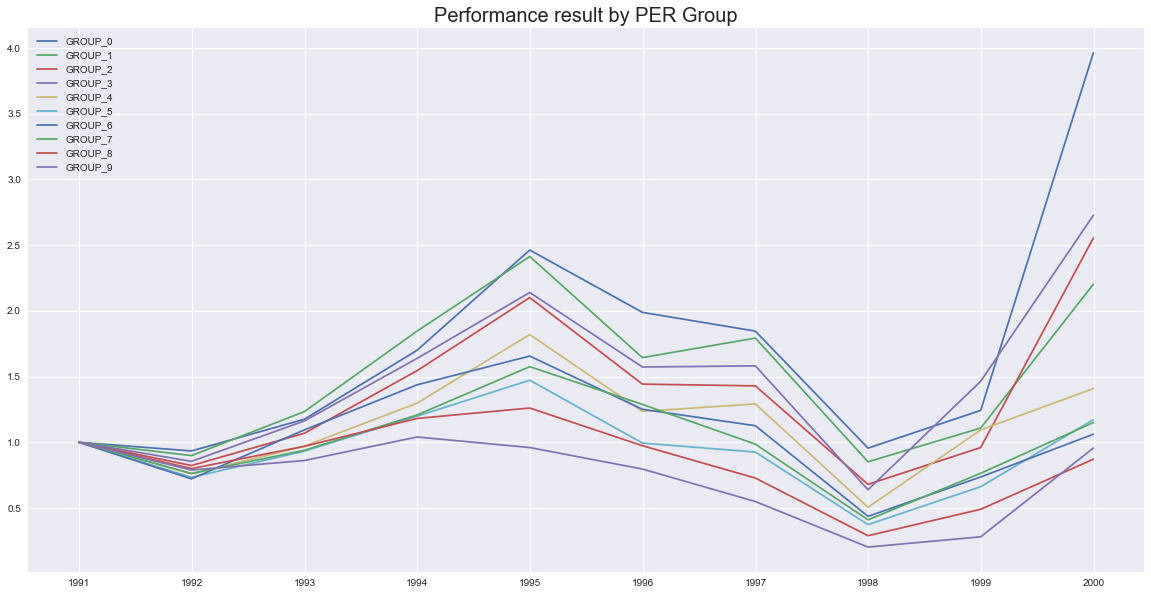

In [16]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:10].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

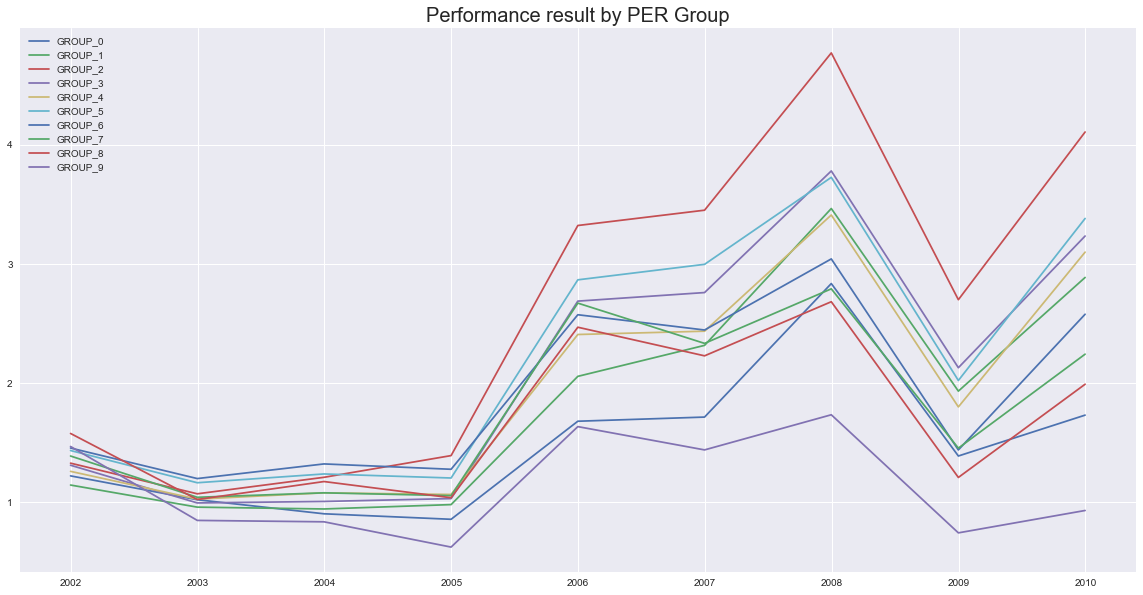

In [17]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[11:20].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

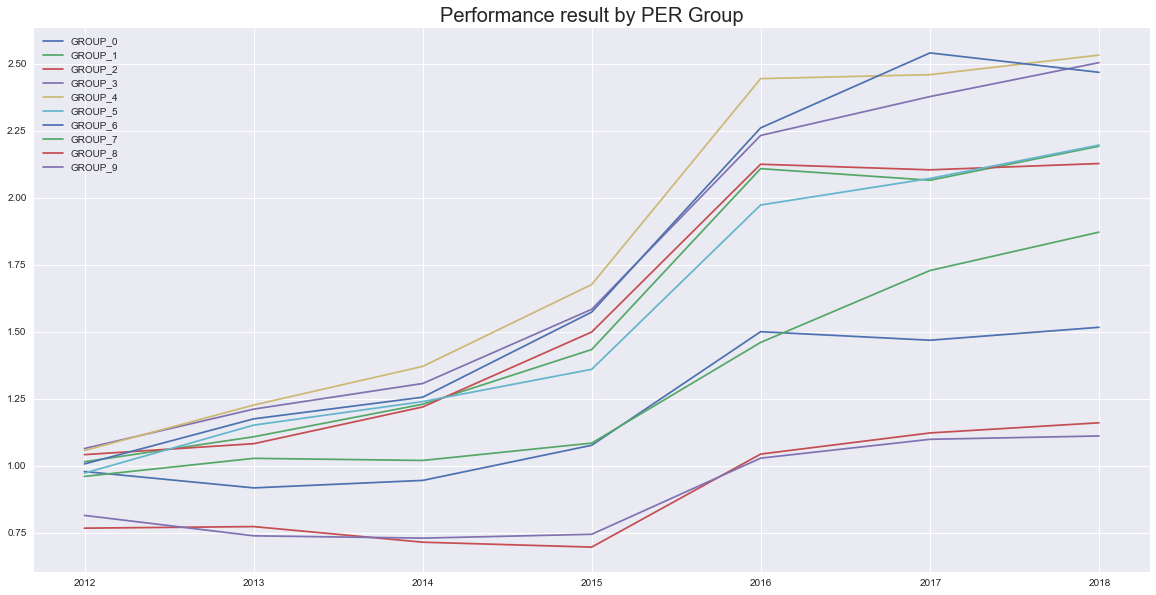

In [18]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[21:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

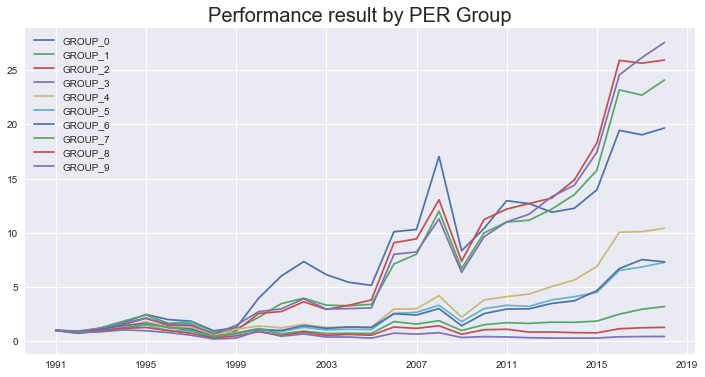

In [19]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

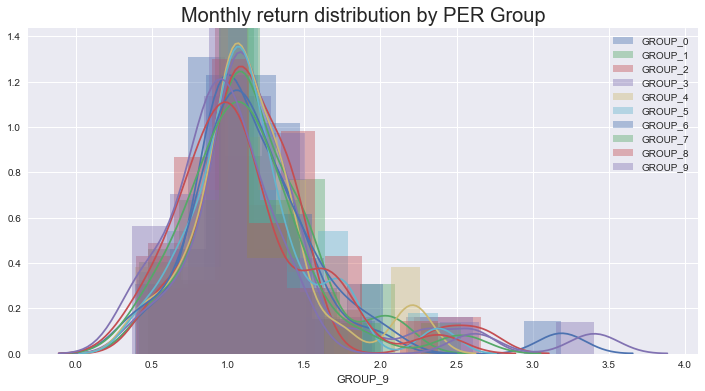

In [20]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [21]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,1.191,1.177,1.195,1.203,1.156,1.142,1.136,1.114,1.088,1.087
std,0.505,0.367,0.458,0.460,0.411,0.411,0.367,0.424,0.436,0.619
min,0.490,0.475,0.476,0.404,0.391,0.404,0.388,0.416,0.397,0.369
25%,0.937,0.996,0.998,1.011,0.997,0.962,0.945,0.860,0.793,0.809
50%,1.032,1.104,1.106,1.086,1.068,1.070,1.113,1.067,1.021,0.987
75%,1.324,1.397,1.366,1.362,1.300,1.276,1.344,1.291,1.214,1.205
max,3.189,2.097,2.660,2.606,2.259,2.381,2.015,2.530,2.377,3.404
